<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 9.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you pr

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
ds = pd.read_csv("/content/sample_data/bank-1.csv")

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
ds.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
# Number of rows and columns in the training data
print(f"There are {ds.shape[0]} rows and {ds.shape[1]} columns.")

There are 10000 rows and 14 columns.


### Check the data types of the columns for the dataset

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Every variable is numerical, with the exception of Surname, Geography, and Gender.

### Checking the Statistical Summary

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [ ]:
# checking for missing values in the data
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


There are no missing values in the dataset.

### Checking for unique values for each of the column

In [ ]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
#checking for duplicate values
ds.duplicated().sum()

0

There are no duplicate values in the dataset.

In [ ]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Dropping "RowNumber", "CustomerId", "Surname" as they don't provide any additional information in the dataset.

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* The average consumer credit score is roughly 650, indicating a comparatively good credit standing.
* 37 is the median age, indicating younger client.
* The boolean variables HasCrCard, IsActiveMember, and Exited have values of either 0 or 1.
* With a 25th percentile value of 0, the "Balance" variable indicates that a sizable percentage of clients have balance of 0. There is a possibility of right-skewness.


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

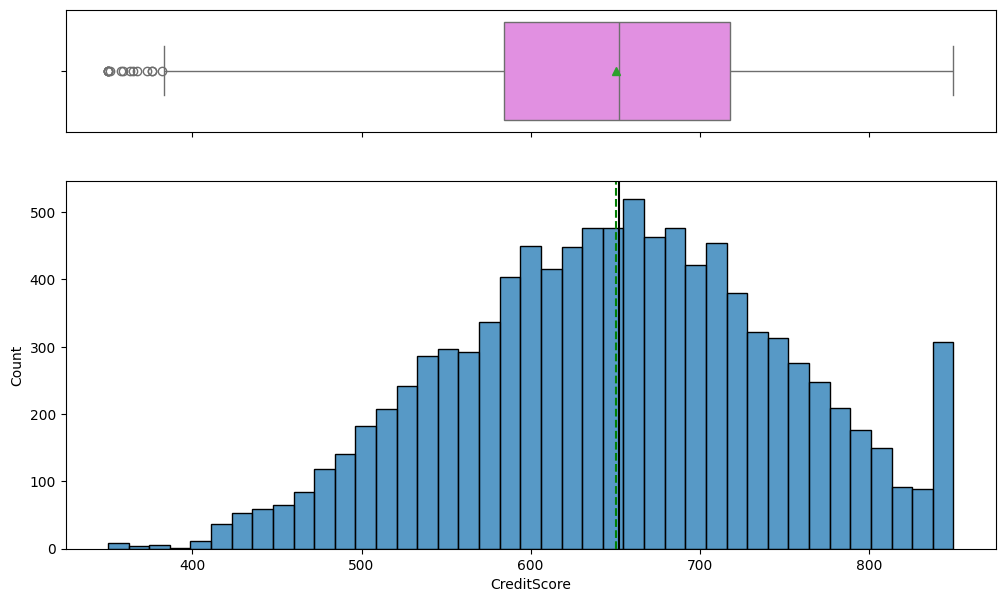

In [ ]:
histogram_boxplot(ds,'CreditScore')

* The distribution of credit score is normal.
* There is a few outliers on the left.

#### Observations on Age

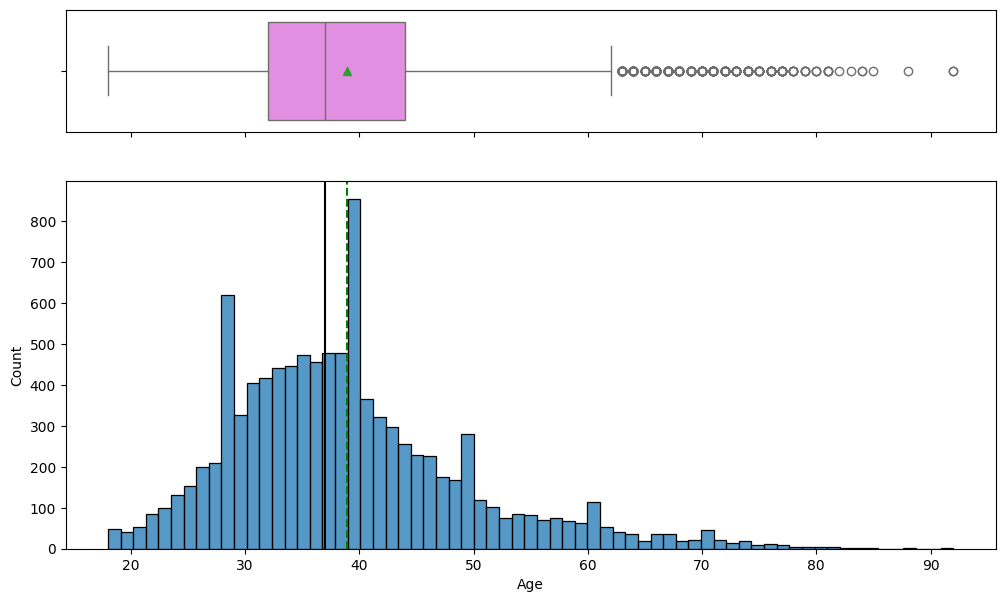

In [ ]:
histogram_boxplot(ds,'Age')

* The distribution of age shows a right skew with the mean greater than the median.
* There are outliers on the right.

#### Observations on Balance

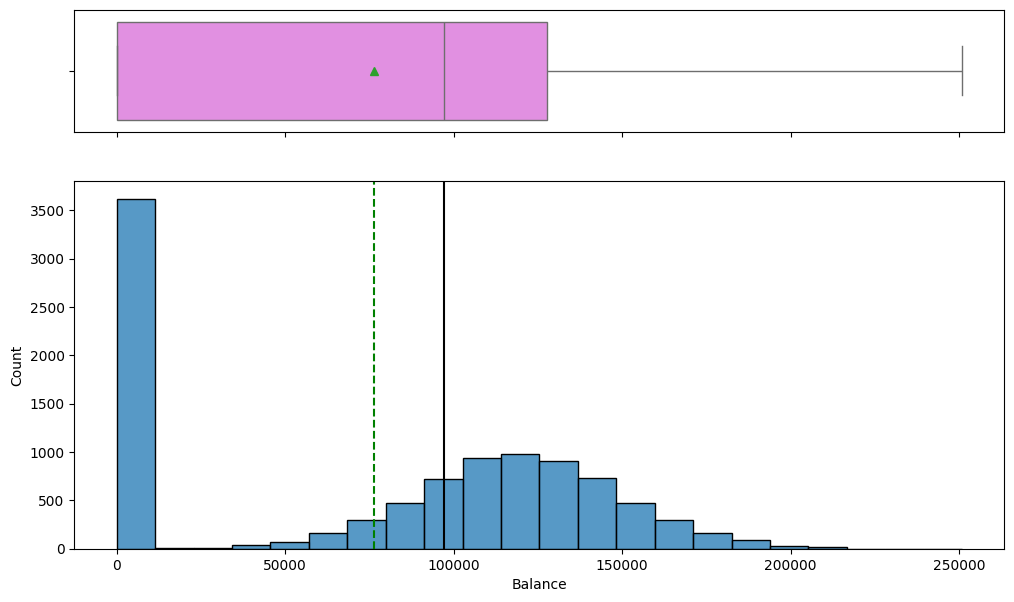

In [ ]:
histogram_boxplot(ds,'Balance')

* The distribution of Balance has a left skew due to the presence of high number of 0 balance accounts.

#### Observations on Estimated Salary

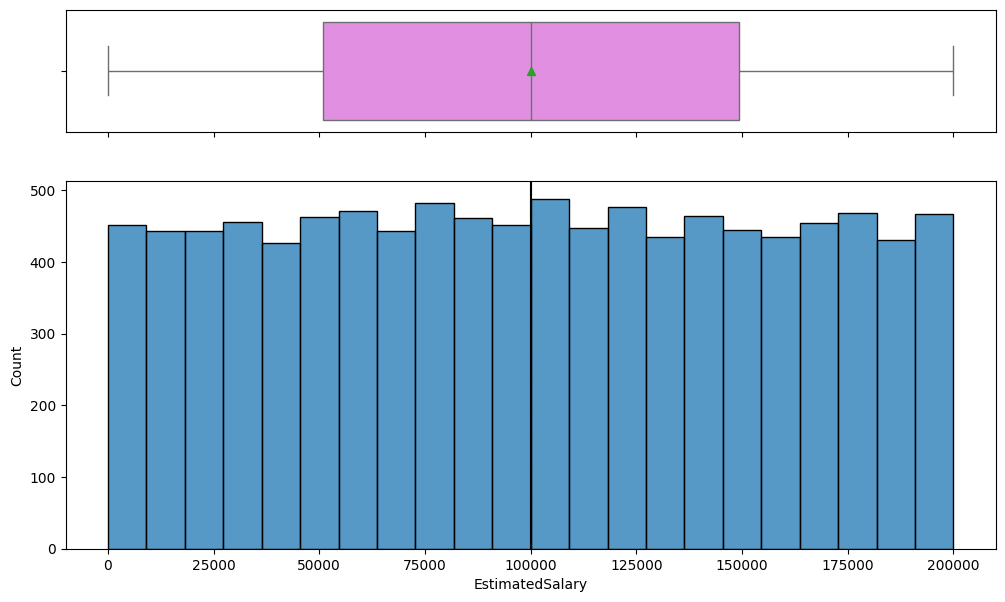

In [ ]:
histogram_boxplot(ds, 'EstimatedSalary')

* The distribution of salary is approximately unifrom ranging from 0 to 200000.
* The mean and median are approximately equal at 10,000

#### Observations on Exited

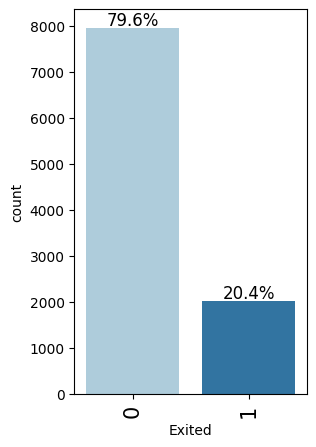

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

* 20.4% of customers in the bank have exited the bank, while 79.6% are still part of the bank.

#### Observations on Geography

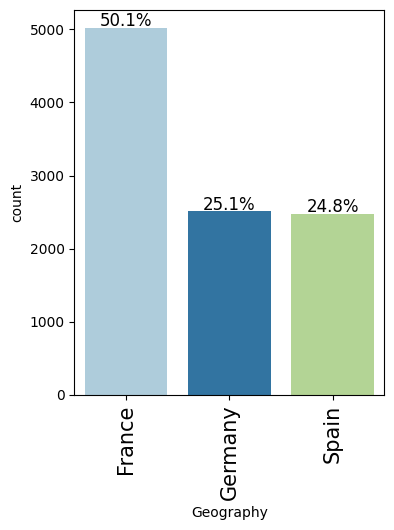

In [ ]:
labeled_barplot(ds, 'Geography', perc = True)

* ~50% of customers are from France.

#### Observations on Gender

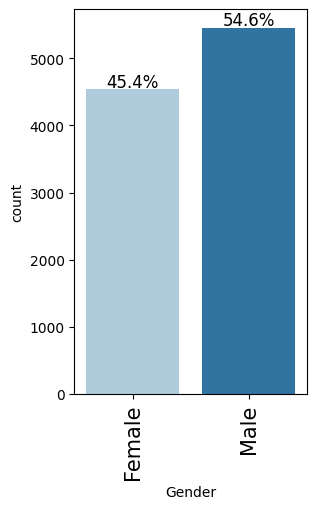

In [ ]:
labeled_barplot(ds,'Gender', perc = True)

* Males have higher representation than females with 54.6%

#### Observations on Tenure

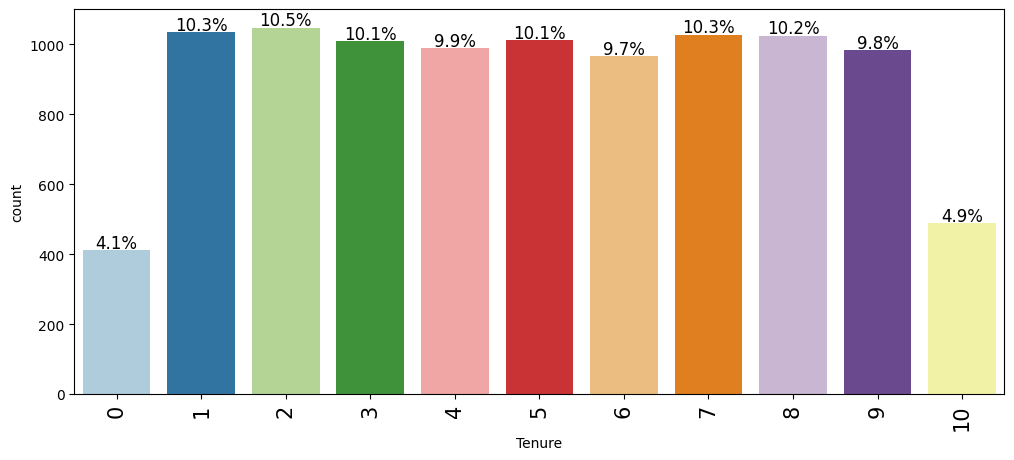

In [ ]:
labeled_barplot(ds, 'Tenure', perc = True)

* Merely 4% of the customers have a tenure of 0, and 6% have a tenure of 10. Additionally, each of the tenures from 1 to 9 years are represented by approximately 10% of the customers.

#### Observations on Number of Products

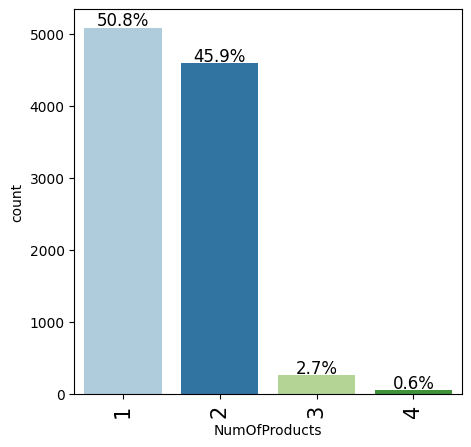

In [ ]:
labeled_barplot(ds, 'NumOfProducts', perc = True)

* ~51% of the customers possess a single product from the bank, while 46% own 2 products.

#### Observations on Has Credit Card

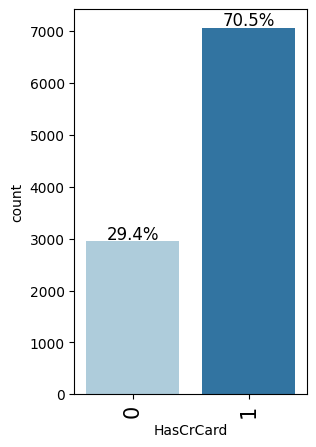

In [ ]:
labeled_barplot(ds, 'HasCrCard', perc = True)

* 70.5% of the customers in the dataset own a credit card.

#### Observations on Is Active Member

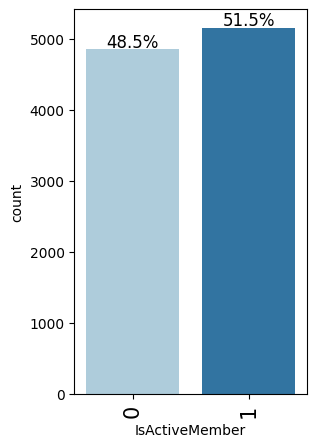

In [ ]:
labeled_barplot(ds, 'IsActiveMember', perc = True)

* 51.5% of customers can be considered and active of the bank compared to 48.5%.

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

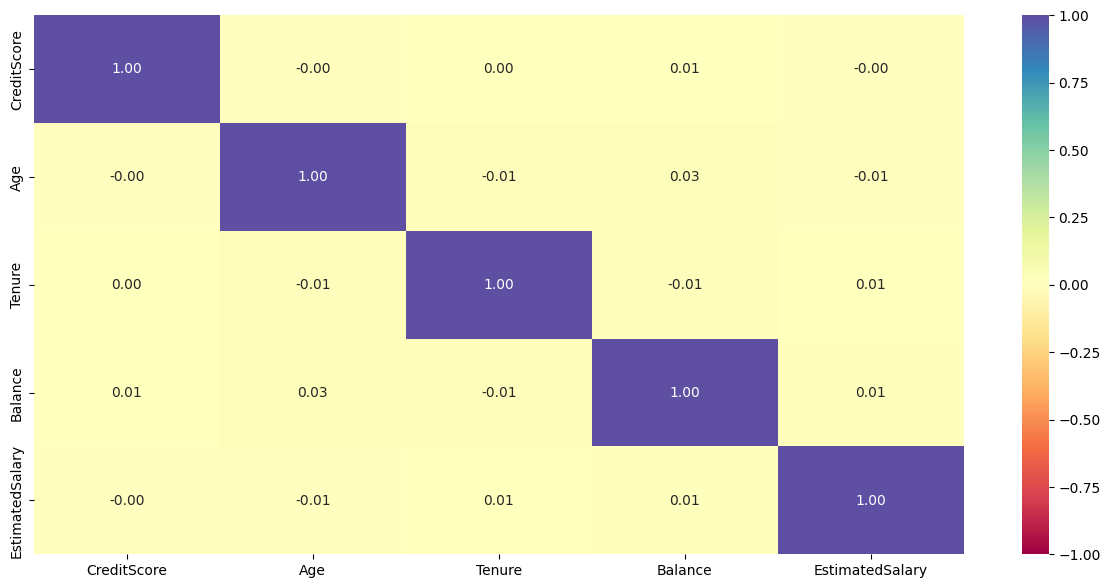

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* No significant correlation between the variables.
* There is some slight positive correlation between Age and Balance.
* There is some slight negative correlation between Age and EstimatedSalary.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


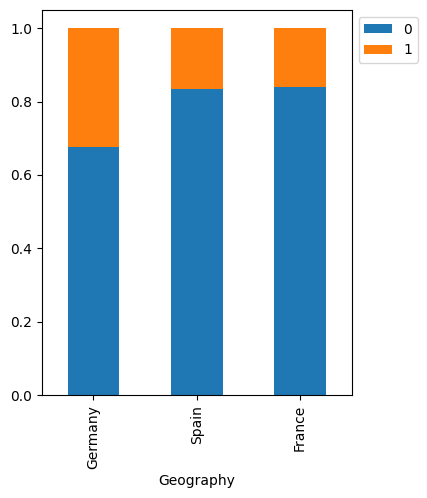

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

* Observed a larger ratio of customers located in Germany have exited than customers located in other countries.
* Customers who are located in Spain and France have a simiar exit ratio.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


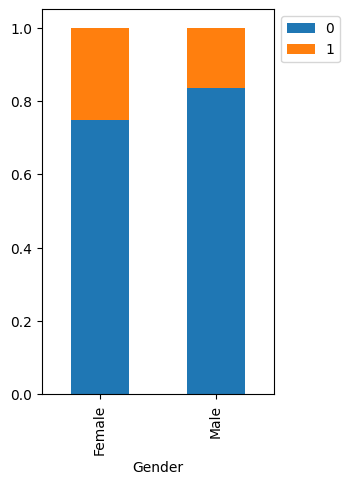

In [ ]:
#ploting stacked barplot for Exited and Gender
stacked_barplot(ds, 'Gender', 'Exited')

* Observed slightly more females have exited than men.
* Although more females have exited, the number of men who have exited is similar.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


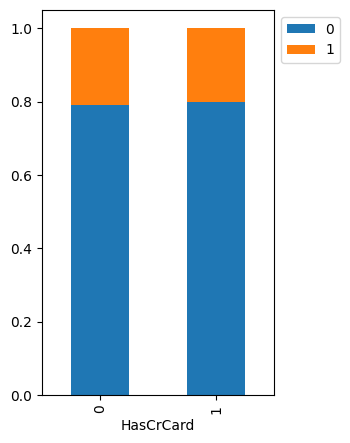

In [ ]:
stacked_barplot(ds, 'HasCrCard', 'Exited')

* Observed class ratios are very similar between customers who have credit cards and those who do not have credit cards.

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


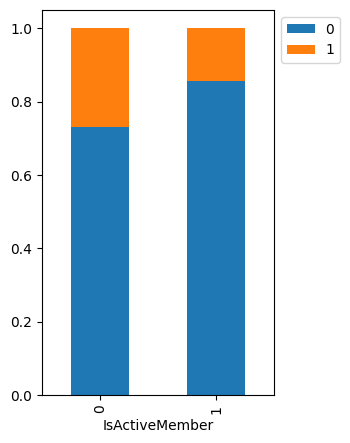

In [ ]:
stacked_barplot(ds, 'IsActiveMember', 'Exited')

* Observed that customers who are not considered to be active members exit at a higher rate than customers who are considered active members.

#### Exited Vs Credit Score

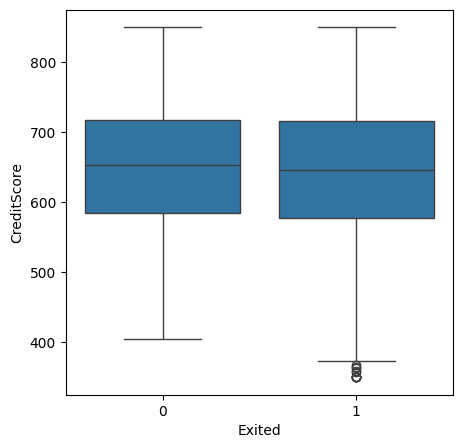

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

* The distribution of CreditScore for customers who have exited and customers who have not exited are very similar.
* The box plots of CrediScore for customers who have exited and customers who have not exited are nearly identical.
* The mimimum CreditScore of customers who have exited is lower than the min CreditScore of csutomers who have not exited.

#### Exited Vs Age

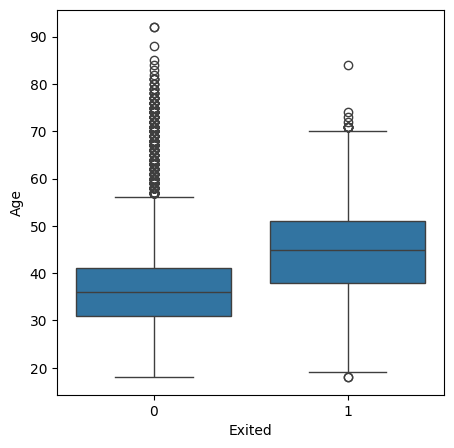

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)

* Observed that the median age of customers who have exited is about 45, whereas the median age of customers who have not exited is about 35.

#### Exited Vs Tenure

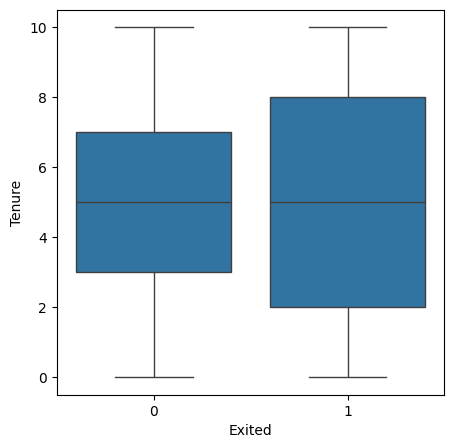

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

#### Exited Vs Balance

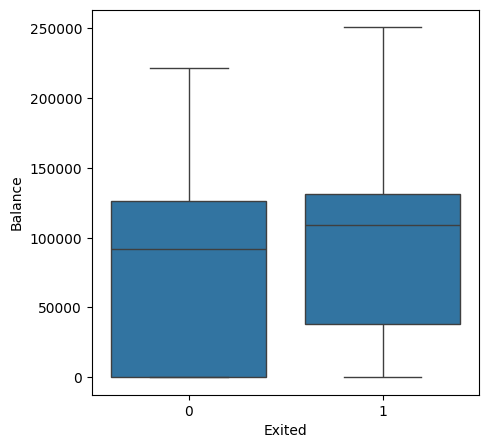

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

* Observed that the peak of the distribution of account balance for customers who have exited is much higher than that of the same distribution for customes who have not exited.
* Observed the max account balance of customers who have exited is higher than the account balance of customers who have not exited.

#### Exited Vs Number of Products

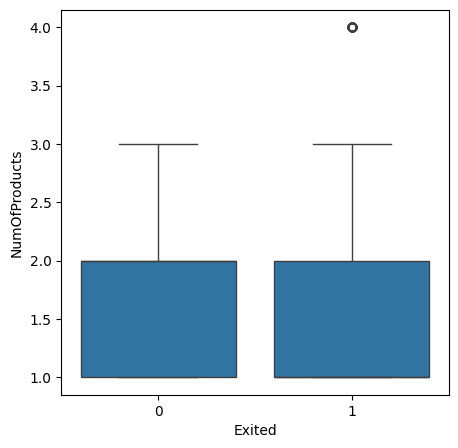

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

#### Exited Vs Estimated Salary

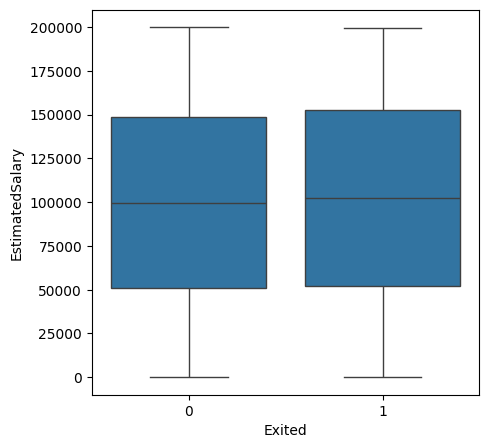

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
#specify the columns to normalize
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


**Let's create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Adding the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

metric = keras.metrics.Recall()

In [ ]:
## Compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,    ## Specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=20,    ## Specify the number of epochs
    verbose=1
)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6360 - recall: 0.1280 - val_loss: 0.5794 - val_recall: 0.0000e+00
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5747 - recall: 0.0020 - val_loss: 0.5425 - val_recall: 0.0000e+00
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5430 - recall: 0.0000e+00 - val_loss: 0.5224 - val_recall: 0.0000e+00
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5255 - recall: 0.0000e+00 - val_loss: 0.5106 - val_recall: 0.0000e+00
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5150 - recall: 0.0000e+00 - val_loss: 0.5029 - val_recall: 0.0000e+00
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5078 - recall: 0.0000e+00 - val_loss: 0.4974 - val_recall: 0.0000e+00
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5024 - recall: 0.0000e+00 - val_loss: 0.4931 - val_recall: 0.0000e+00
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4979 - recall: 0.0000e

**Loss function**

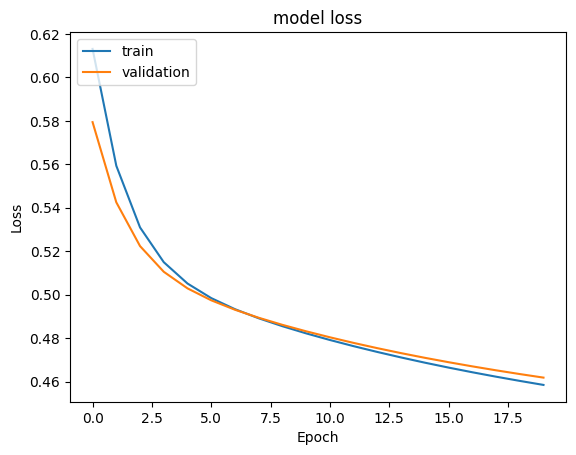

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* Since the learning cureves (training and validation) closely follow each other across epochs, it indicates that the model is likely generalizing well to both the training and validation datasets.

**Recall**

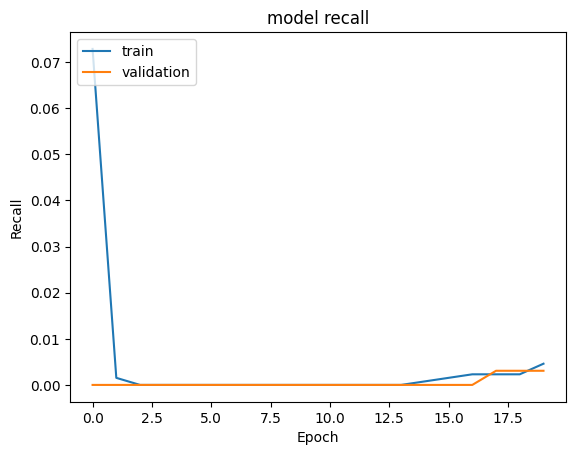

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
#classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      5096
         1.0       0.67      0.00      0.01      1304

    accuracy                           0.80      6400
   macro avg       0.73      0.50      0.45      6400
weighted avg       0.77      0.80      0.71      6400



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Checking the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1274
         1.0       1.00      0.00      0.01       326

    accuracy                           0.80      1600
   macro avg       0.90      0.50      0.45      1600
weighted avg       0.84      0.80      0.71      1600



**Confusion matrix**

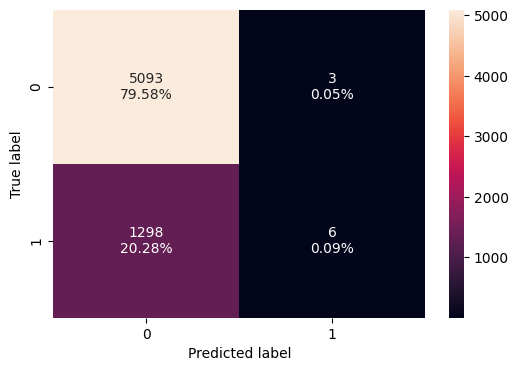

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

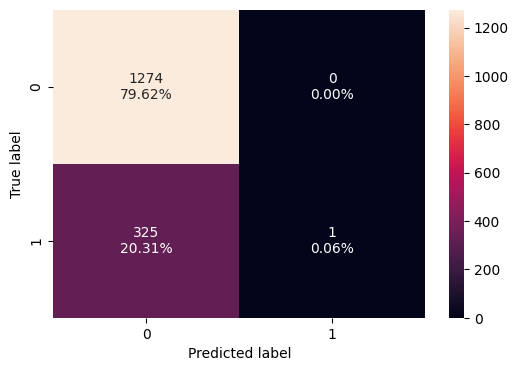

In [ ]:
## Checking the model's performance on the validation set
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
#Adding a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Adding a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu'))
#Adding a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

metric = keras.metrics.Recall()

In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=20,
    verbose=1
)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4932 - recall: 0.0547 - val_loss: 0.4334 - val_recall: 0.1442
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4155 - recall: 0.2606 - val_loss: 0.4218 - val_recall: 0.1902
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3998 - recall: 0.3316 - val_loss: 0.4118 - val_recall: 0.2638
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3873 - recall: 0.3643 - val_loss: 0.4034 - val_recall: 0.2883
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3767 - recall: 0.3983 - val_loss: 0.3962 - val_recall: 0.3160
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3681 - recall: 0.4116 - val_loss: 0.3906 - val_recall: 0.3098
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3606 - recall: 0.4309 - val_loss: 0.3858 - val_recall: 0.3190
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3541 - recall: 0.4461 - val_loss: 0.3818 - val_recall: 0.3374
Epoch 9/

**Loss function**

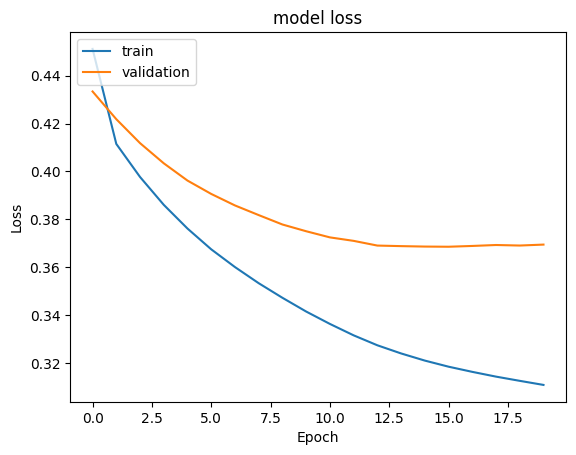

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* The increasing gap validation loss curve between train and suggests that the model is continuing to improve its fit to the training data, but these improvements are not translating to the validation data. This could be a sign of overfitting.

**Recall**

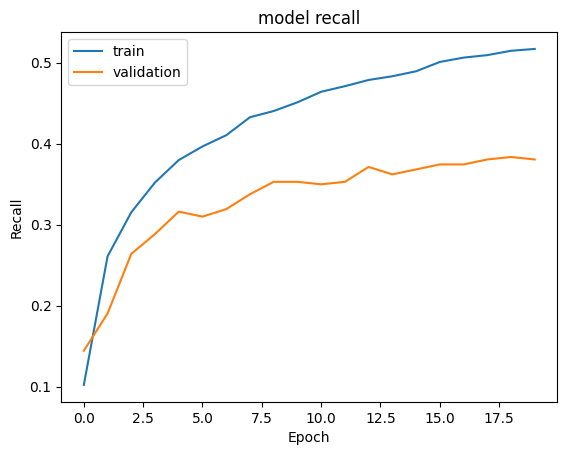

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam"
train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      5096
         1.0       0.82      0.49      0.61      1304

    accuracy                           0.87      6400
   macro avg       0.85      0.73      0.77      6400
weighted avg       0.87      0.87      0.86      6400



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)  ## Checking the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      5096
         1.0       0.82      0.49      0.61      1304

    accuracy                           0.87      6400
   macro avg       0.85      0.73      0.77      6400
weighted avg       0.87      0.87      0.86      6400



**Confusion matrix**

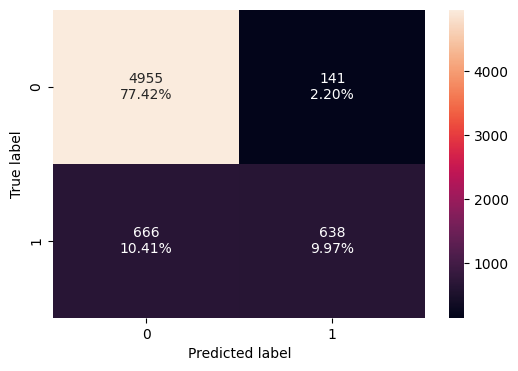

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

* The FN percentage of (2.20%) is considerable high when compared to TN percentage of (9.97%) and this expected since the target classes are imbalanced. 2.20% of FN is low compared to the whole dataset.

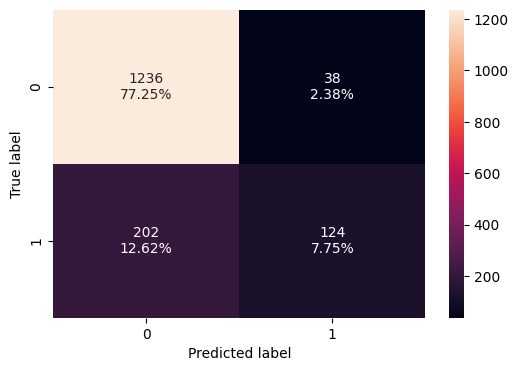

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Checking the model's performance on the validation set

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Adding dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Adding a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(64,activation='relu'))
# Adding a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(32,activation='relu'))
# Adding dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# Adding a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# Adding the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

metric = keras.metrics.Recall()


In [ ]:
## Compiling the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.5003 - recall: 0.0502 - val_loss: 0.4381 - val_recall: 0.0215
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4449 - recall: 0.1103 - val_loss: 0.4283 - val_recall: 0.1472
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4299 - recall: 0.2041 - val_loss: 0.4192 - val_recall: 0.2209
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4200 - recall: 0.2590 - val_loss: 0.4124 - val_recall: 0.2638
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4132 - recall: 0.3010 - val_loss: 0.4064 - val_recall: 0.3037
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4067 - recall: 0.3418 - val_loss: 0.4027 - val_recall: 0.3190
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4027 - recall: 0.3455 - val_loss: 0.4021 - val_recall: 0.3129
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3929 - recall: 0.3576 - val_loss: 0.3982 - val_recall: 0.3282


**Loss function**

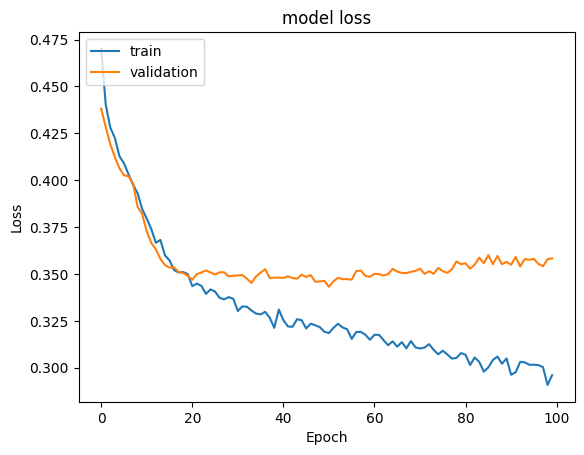

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* Training loss decreases steadily as the number of epochs increases. This indicates that the model is learning and improving its performance on the training data over time.
* The validation loss, which also decreases initially but starts to diverge from the training loss around epoch 20. This could suggest that the model is beginning to overfit the training data.

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

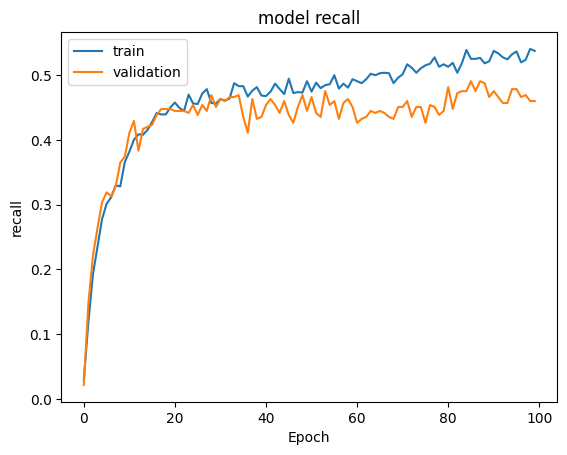

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      5096
         1.0       0.83      0.58      0.69      1304

    accuracy                           0.89      6400
   macro avg       0.87      0.78      0.81      6400
weighted avg       0.89      0.89      0.88      6400



In [ ]:
#classification report
cr = classification_report(y_val, y_val_pred) ## Checking the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1274
         1.0       0.70      0.46      0.56       326

    accuracy                           0.85      1600
   macro avg       0.79      0.71      0.73      1600
weighted avg       0.84      0.85      0.84      1600



**Confusion matrix**

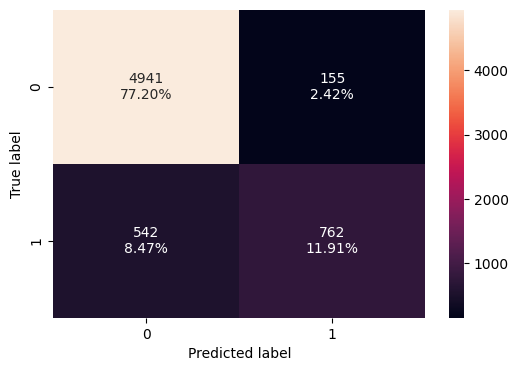

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

* The FN count has decreased yet the target variable imbalance is still affecting the figures. Let us train the same model on the oversampled data and observe the difference.

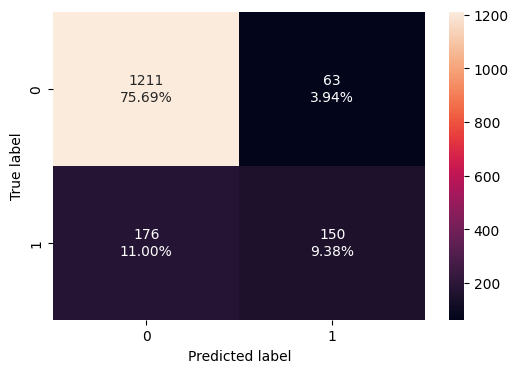

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Checking the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm  = SMOTE(random_state=42)
#Fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_3 = Sequential()
#Adding a input layer (specify the # of neurons and activation function)
model_3.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Adding a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu'))
#Adding a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
#Adding the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

metric = keras.metrics.Recall()

In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,953 (7.63 KB)

 Trainable params: 1,953 (7.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=20,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.6151 - recall: 0.6553 - val_loss: 0.5868 - val_recall: 0.6564
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6111 - recall: 0.6650 - val_loss: 0.5841 - val_recall: 0.6626
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6073 - recall: 0.6691 - val_loss: 0.5819 - val_recall: 0.6718
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6038 - recall: 0.6747 - val_loss: 0.5801 - val_recall: 0.6779
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6005 - recall: 0.6792 - val_loss: 0.5786 - val_recall: 0.6871
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5975 - recall: 0.6845 - val_loss: 0.5775 - val_recall: 0.6902
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5947 - recall: 0.6885 - val_loss: 0.5767 - val_recall: 0.6994
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5922 - recall: 0.6924 - val_loss: 0.5761 - val_recall: 0.7025
Epoch 9/

**Loss function**

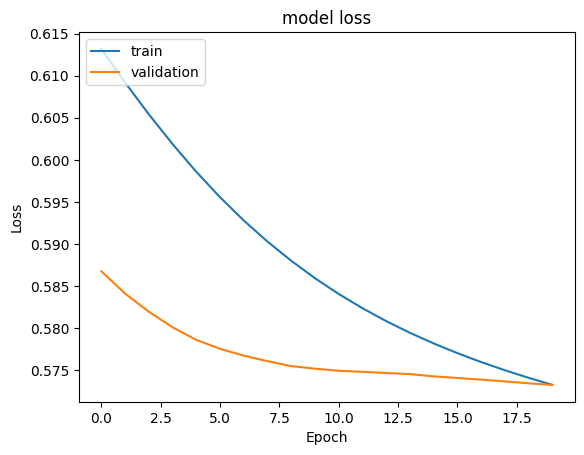

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* Towards the end, the training loss continues to decrease slightly while the validation loss remains relatively stable. This could suggest that the model is starting to overfit.

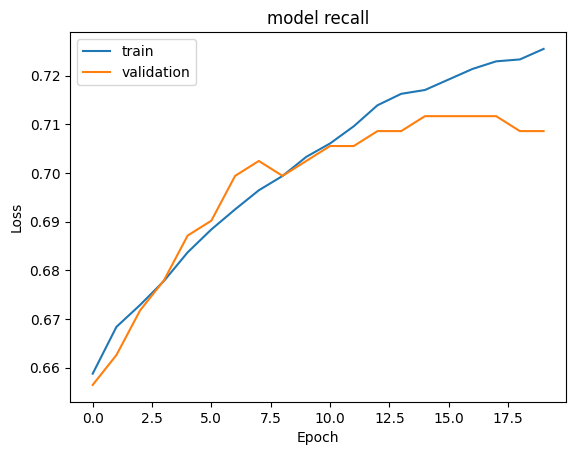

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72      5096
         1.0       0.72      0.73      0.72      5096

    accuracy                           0.72     10192
   macro avg       0.72      0.72      0.72     10192
weighted avg       0.72      0.72      0.72     10192



In [ ]:
cr=classification_report(y_val_smote, y_val_pred) ## Checking the model's performance on the validation set
print(cr)

NameError: name 'y_val_smote' is not defined

**Confusion matrix**

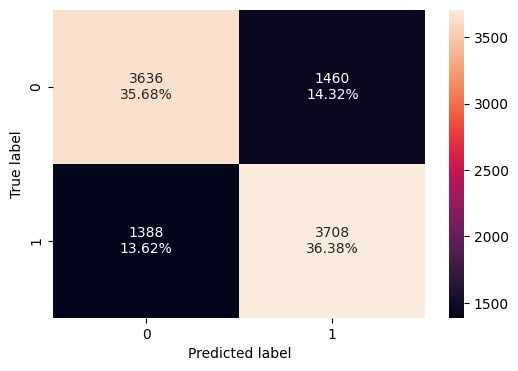

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

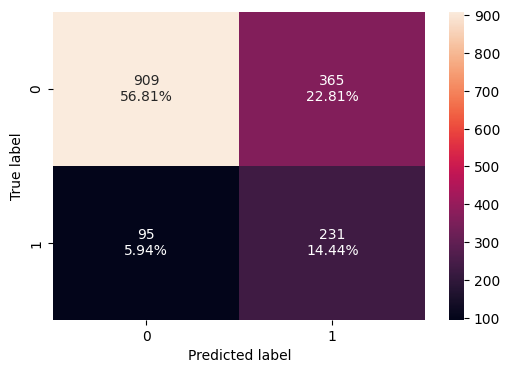

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred) ## Checking the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
#Adding a input layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Adding a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu'))
#Adding a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(8,activation='relu'))
#Adding the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,953 (7.63 KB)

 Trainable params: 1,953 (7.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,953 (7.63 KB)

 Trainable params: 1,953 (7.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=20,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.6227 - recall: 0.7097 - val_loss: 0.5629 - val_recall: 0.6933
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5416 - recall: 0.7336 - val_loss: 0.5534 - val_recall: 0.7086
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5083 - recall: 0.7518 - val_loss: 0.5364 - val_recall: 0.7362
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4833 - recall: 0.7732 - val_loss: 0.5245 - val_recall: 0.7454
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4658 - recall: 0.7879 - val_loss: 0.5105 - val_recall: 0.7607
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4464 - recall: 0.7942 - val_loss: 0.4960 - val_recall: 0.7454
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4336 - recall: 0.7985 - val_loss: 0.4922 - val_recall: 0.7393
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4240 - recall: 0.8028 - val_loss: 0.4859 - val_recall: 0.7362
Epoch 9

**Loss function**

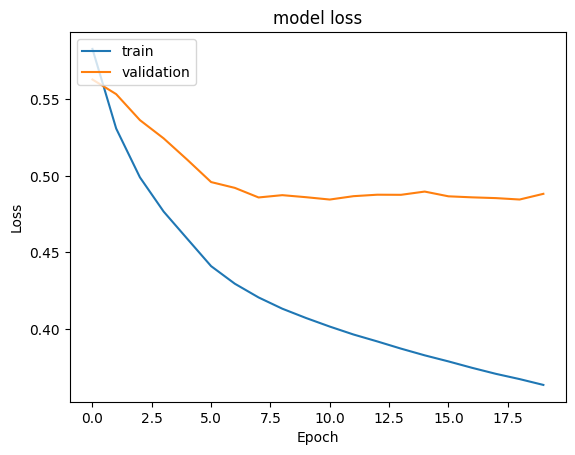

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* The validation loss decreases initially but starts fluctuating after around epoch 6, which could be an indication of overfitting.

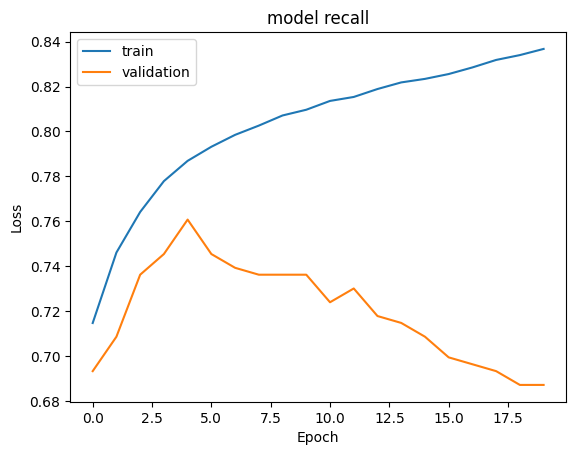

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      5096
         1.0       0.83      0.86      0.85      5096

    accuracy                           0.84     10192
   macro avg       0.84      0.84      0.84     10192
weighted avg       0.84      0.84      0.84     10192



In [ ]:
cr=classification_report(y_val, y_val_pred) ## Checking the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      1274
         1.0       0.47      0.69      0.56       326

    accuracy                           0.78      1600
   macro avg       0.69      0.74      0.70      1600
weighted avg       0.82      0.78      0.79      1600



**Confusion matrix**

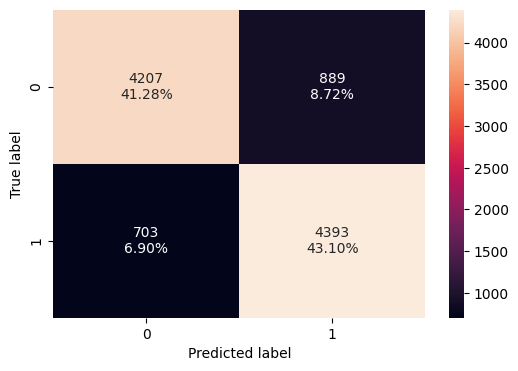

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

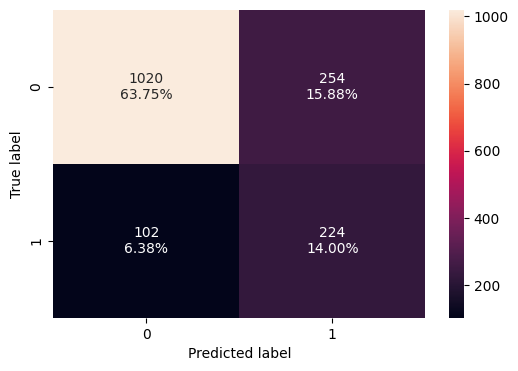

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Checking the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_5 = Sequential()
# Adding required # of neurons to the input layer with relu as activation function
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Adding dropout rate
model_5.add(Dropout(0.3))
#Adding required # neurons to the hidden layer with any activation function.
model_5.add(Dense(32,activation='relu'))
#Add dropout rate.
model_5.add(Dropout(0.3))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
#Adding the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()


In [ ]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,121 (12.19 KB)

 Trainable params: 3,121 (12.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=20,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 0.6592 - recall: 0.6199 - val_loss: 0.5714 - val_recall: 0.6840
Epoch 2/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5806 - recall: 0.7063 - val_loss: 0.5646 - val_recall: 0.6748
Epoch 3/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5605 - recall: 0.7131 - val_loss: 0.5475 - val_recall: 0.6626
Epoch 4/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5463 - recall: 0.7169 - val_loss: 0.5366 - val_recall: 0.6595
Epoch 5/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5370 - recall: 0.7207 - val_loss: 0.5379 - val_recall: 0.6748
Epoch 6/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5233 - recall: 0.7305 - val_loss: 0.5209 - val_recall: 0.6718
Epoch 7/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5165 - recall: 0.7272 - val_loss: 0.5175 - val_recall: 0.6779
Epoch 8/20
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5051 - recall: 0.7409 - val_loss: 0.5039 - val_recall: 0.7147
Epoch 

**Loss function**

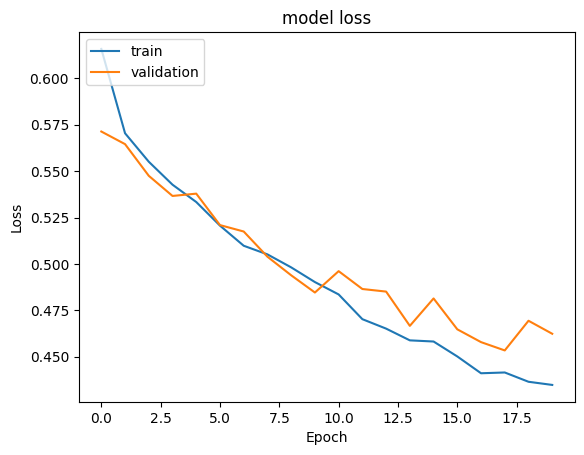

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* The validation loss is fluctuating which could be an indication of overfitting.

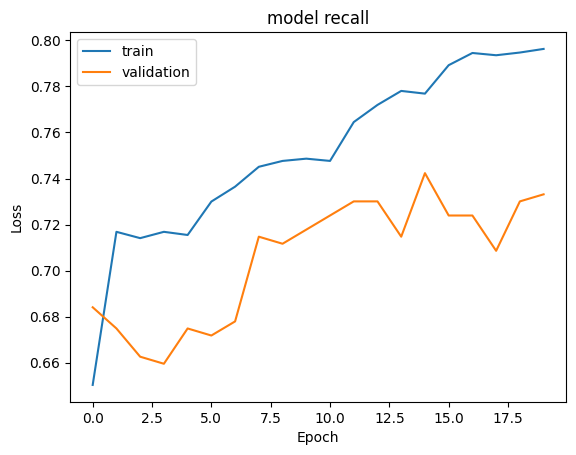

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      5096
         1.0       0.82      0.84      0.83      5096

    accuracy                           0.83     10192
   macro avg       0.83      0.83      0.83     10192
weighted avg       0.83      0.83      0.83     10192



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)  ## Checking the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86      1274
         1.0       0.49      0.73      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.77      0.72      1600
weighted avg       0.83      0.79      0.80      1600



**Confusion matrix**

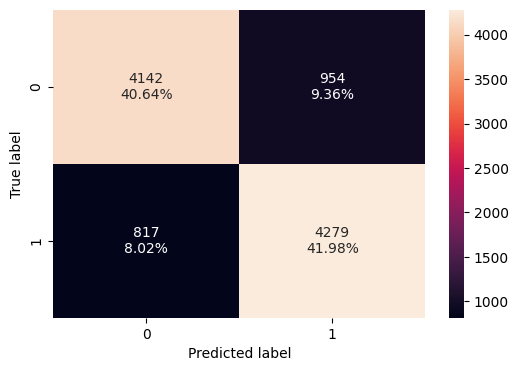

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

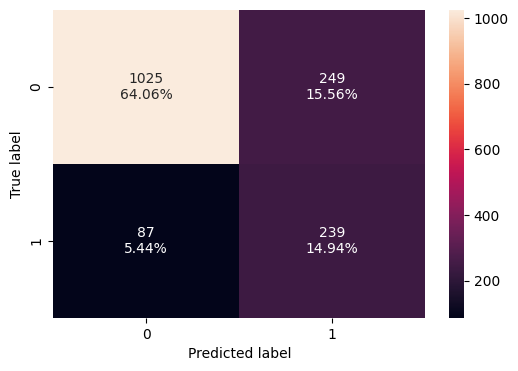

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Checking the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.004601
NN with Adam,0.489264
NN with Adam & Dropout,0.584356
NN with SMOTE & SGD,0.727630
NN with SMOTE & Adam,0.862049
"NN with SMOTE,Adam & Dropout",0.839678


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.003067
NN with Adam,0.380368
NN with Adam & Dropout,0.460123
NN with SMOTE & SGD,0.708589
NN with SMOTE & Adam,0.687117
"NN with SMOTE,Adam & Dropout",0.733129


In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.001534
NN with Adam,0.108896
NN with Adam & Dropout,0.124233
NN with SMOTE & SGD,0.019041
NN with SMOTE & Adam,0.174932
"NN with SMOTE,Adam & Dropout",0.106549


In [ ]:
y_test_pred = model_5.predict(X_test)    ## Specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
#Printing classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      1593
         1.0       0.48      0.76      0.59       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.78      0.80      2000



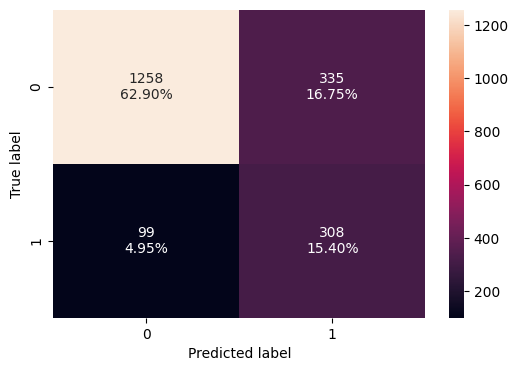

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

Key Observations:
* The FN ratio aws very challenging to reduce as at the majority of modles it was inversly proportional with the recall (recall value enhances and FN value worsens)
* Utilizing the oversampled data entroduced noise in the validation dataset loss curve, yet it supported the model to a slightly better performance
* It was observed from the EDA that the dataset target classes were imbalanced.
* It was also observed from the EDA that the majority of features are in fact very poor predictors.
* ANN used on the synthesized data (SMOTE) was also working and this might also be the case that a particular data point generated in SMOTE might not make sense.


Conclusions:

* Engagement of dormant Members: The bank might launch a campaign to turn dormant members into active clients. To help these clients get the most out of their accounts, this can entail contacting them with exclusive deals or incentives or offering them individualized financial guidance.

* Product Retention and Diversification: This is a chance to encourage custoemrs to diversify their product holdings because the minority of customers who only own one product (51%). Create retention techniques to hold on to clients that possess numerous items, like incentives or packaged services.

* Services That Consider Gener: The proportion of female customers churning is also greater than that of male customers. The majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

* Retention based on Tenure: Higher rates of customer churn are seen among those with shorter tenures- one year and zero years. Use promotions, individualized services, or onboarding programs to win over more customers throughout the early years of their bank relationship.

* The older customers are churning at more than the younger ones to a difference in service perference in the age categories. The bank may need to review its target market or review the strategy for retention between different age groups.


<font size=6 color='blue'>Power Ahead</font>
___